In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [197]:
#Read in the csv file and convert to a Pandas dataframe
df_player=pd.read_csv(r"C:\Users\Eknjz\Desktop\DATA SCIENCE AND MACHINE LEARNING\DAY21\Usecase-7\final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [198]:
df_player.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [199]:
df_player.shape # the dataframe shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [200]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [201]:
df_player.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [202]:
df_player.columns 

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [203]:
# in the kaggle page mentioned data source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [204]:
# check one of the files and the big file 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [205]:
df_player.shape

(10754, 22)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [206]:
df_player.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [207]:
df_player.duplicated().sum() # -> 0 duplicated rows

0

In [208]:
df_player.drop_duplicates(inplace=True)
df_player[df_player.duplicated()]  # ->NO duplicated rows

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [209]:
 df_player.shape # the same shape of dataset

(10754, 22)

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [210]:
#Display number missing values per column
df_player.isnull().sum().sort_values(ascending = False)

player                 0
team                   0
position_encoded       0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
goals conceded         0
red cards              0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
name                   0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [211]:
# check columns types 
df_player.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [212]:
 df_player.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [213]:
df_player.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [214]:
#Delete all un used columns
#Delete unrelevent columns
df_player.drop(['player','name','team','height','age','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','days_injured','position','winger','games_injured'],axis=1,inplace=True)

In [215]:
# check changes
df_player.head(2)

,appearance,goals,assists,minutes played,award,current_value,highest_value,position_encoded
0,104,0.0,0.0,9390,13,15000000,70000000,1
1,15,0.0,0.0,1304,1,1500000,22000000,1


In [216]:
df_player.shape

(10754, 8)

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)


[![](https://markdown-videos-api.jorgenkh.no/youtube/aUKfwkHfgiA)](https://www.youtube.com/watch?v=aUKfwkHfgiA)

**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


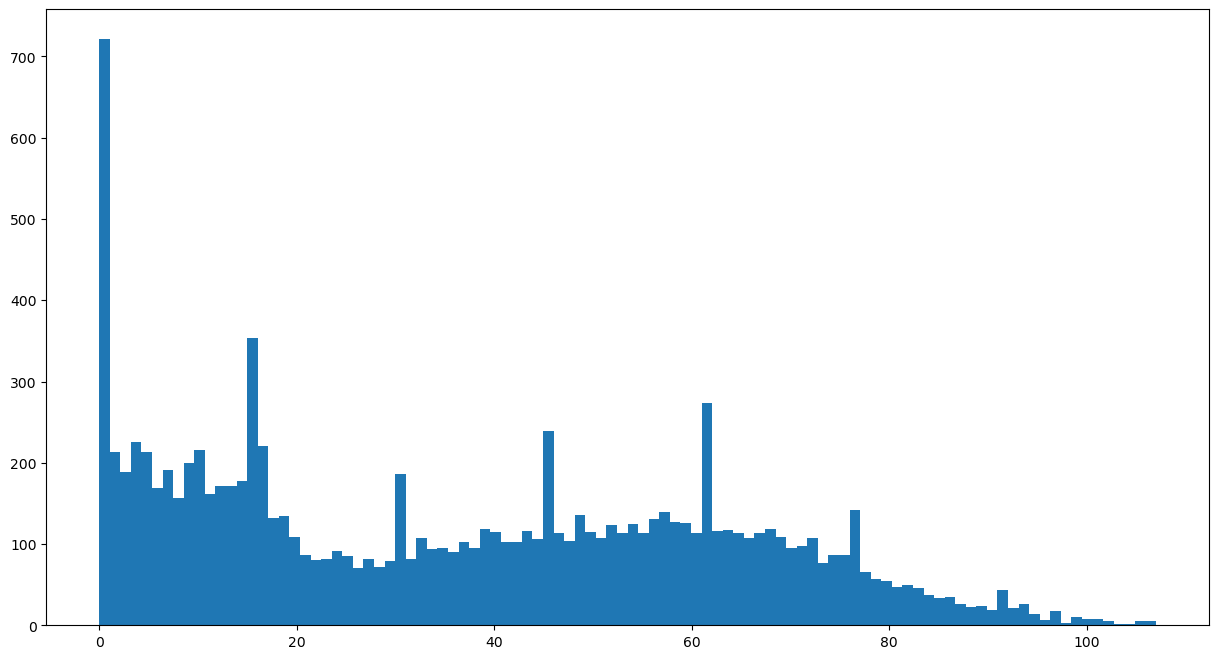

In [217]:
plt.figure(figsize=(15,8))

plt.hist(df_player['appearance'], bins=100)
plt.show()


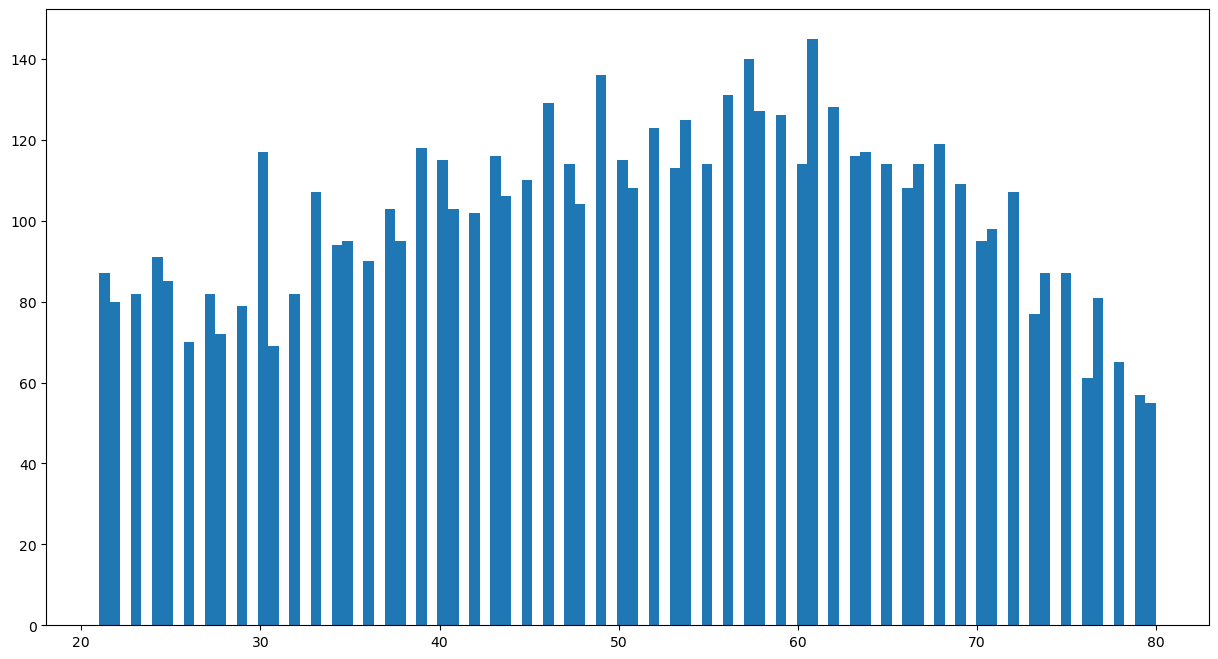

In [218]:
# find the outlier in appearance columns
plt.figure(figsize=(15,8))

plt.hist(df_player[(df_player['appearance']<=80) & (df_player['appearance']>20)]['appearance'], bins=100)
plt.show()


In [219]:
# delete outlier 
df_player=df_player[(df_player['appearance']<=80) & (df_player['appearance']>20)]

In [220]:
df_player.shape

(6109, 8)

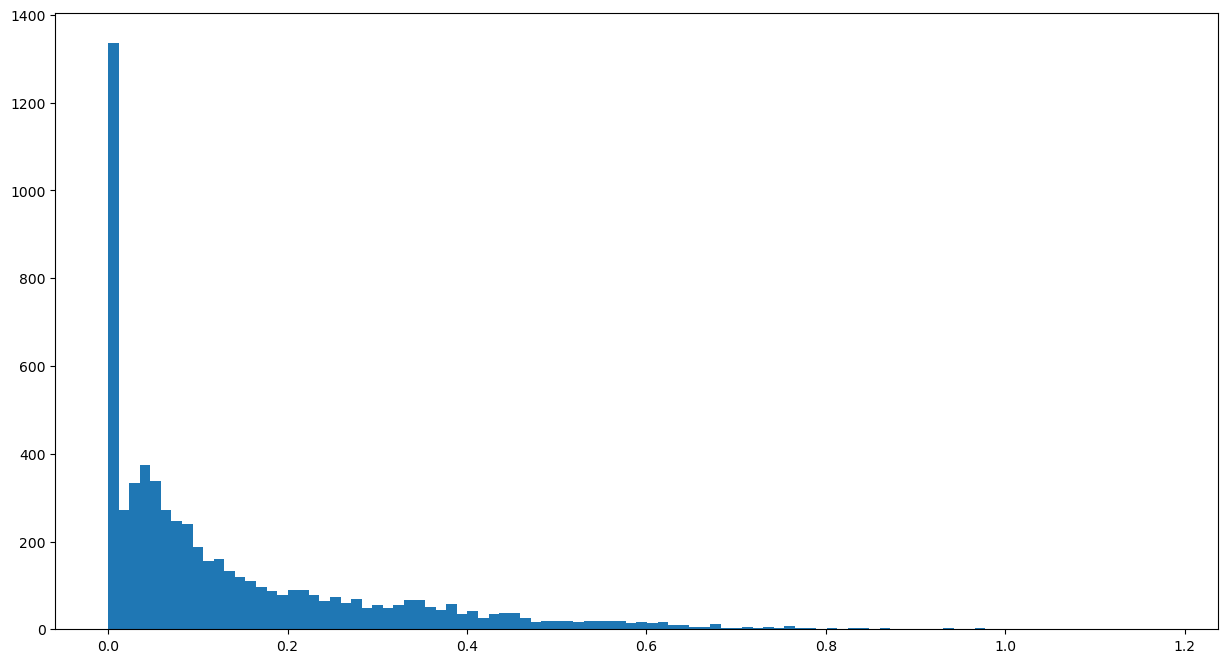

In [221]:
plt.figure(figsize=(15,8))

plt.hist(df_player['goals'], bins=100)
plt.show()

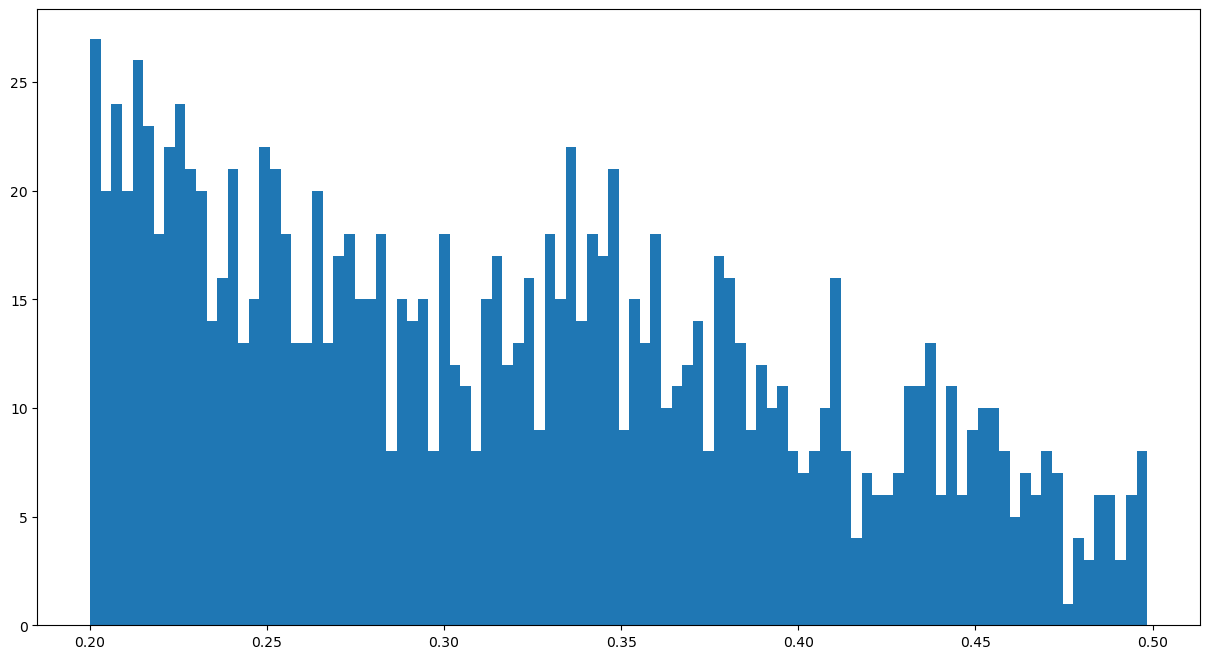

In [222]:
 # find the outlier of goals
plt.figure(figsize=(15,8))

plt.hist(df_player[(df_player['goals']<0.5) & (df_player['goals']>0.2)]['goals'], bins=100)
plt.show()


In [223]:
df_player=df_player[(df_player['goals']<0.6) & (df_player['goals']>0.1)]

In [224]:
df_player.shape

(2472, 8)

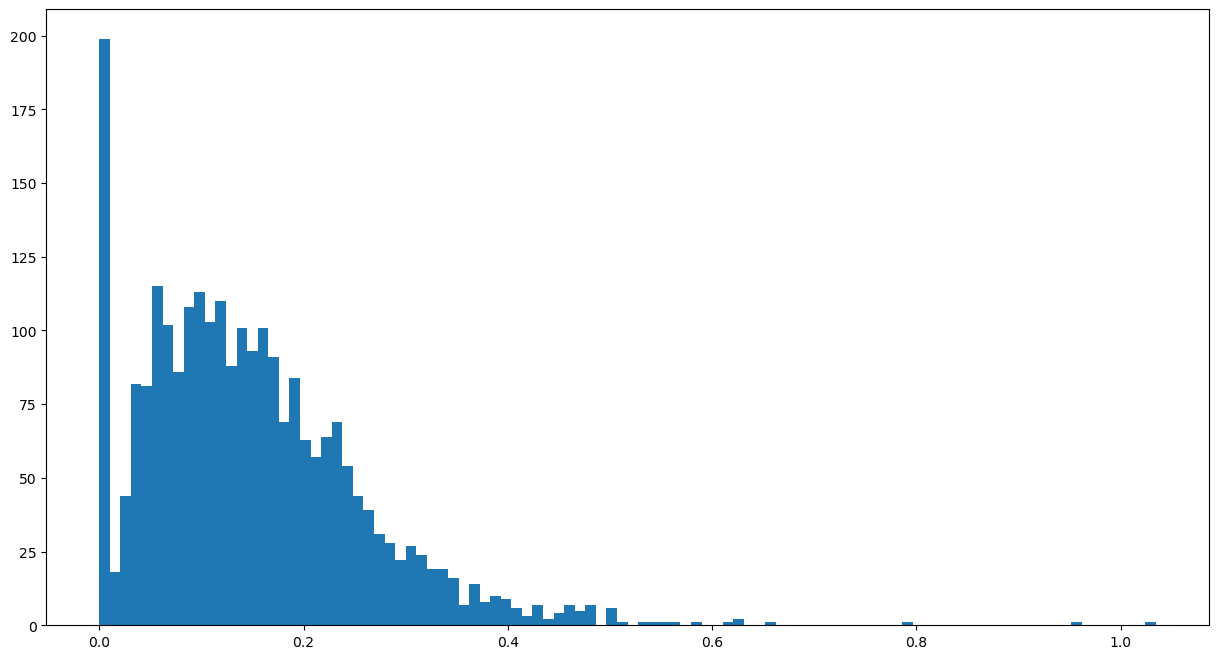

In [225]:
plt.figure(figsize=(15,8))

plt.hist(df_player['assists'], bins=100)
plt.show()

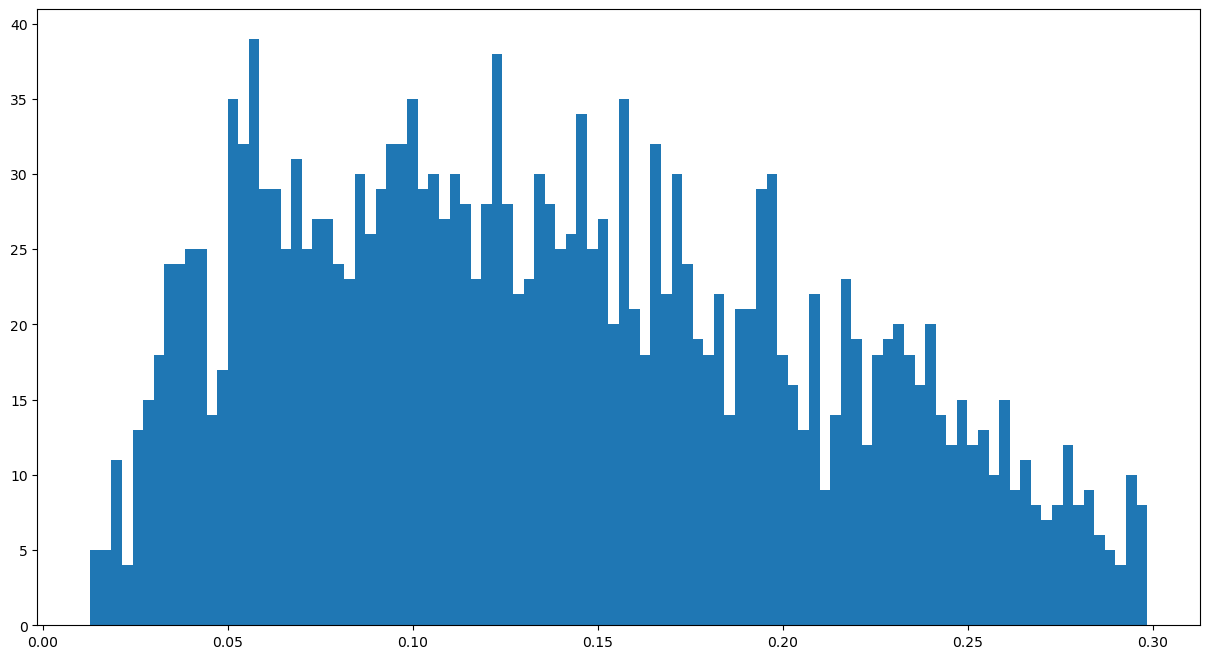

In [226]:
plt.figure(figsize=(15,8))

plt.hist(df_player[(df_player['assists']<=0.3) & (df_player['assists']>0.0)]['assists'], bins=100)
plt.show()


In [227]:
df_player=df_player[(df_player['assists']<=0.3) & (df_player['assists']>0.0)]

In [228]:
df_player.shape

(2060, 8)

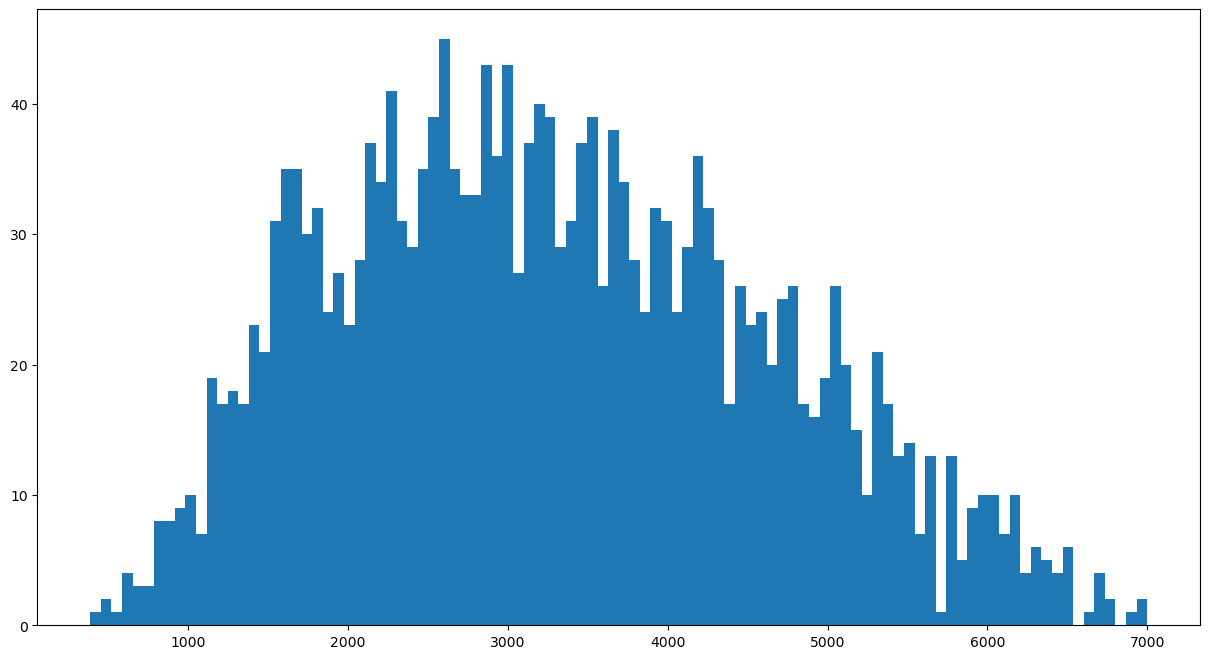

In [229]:
plt.figure(figsize=(15,8))

plt.hist(df_player['minutes played'], bins=100)
plt.show()                                            

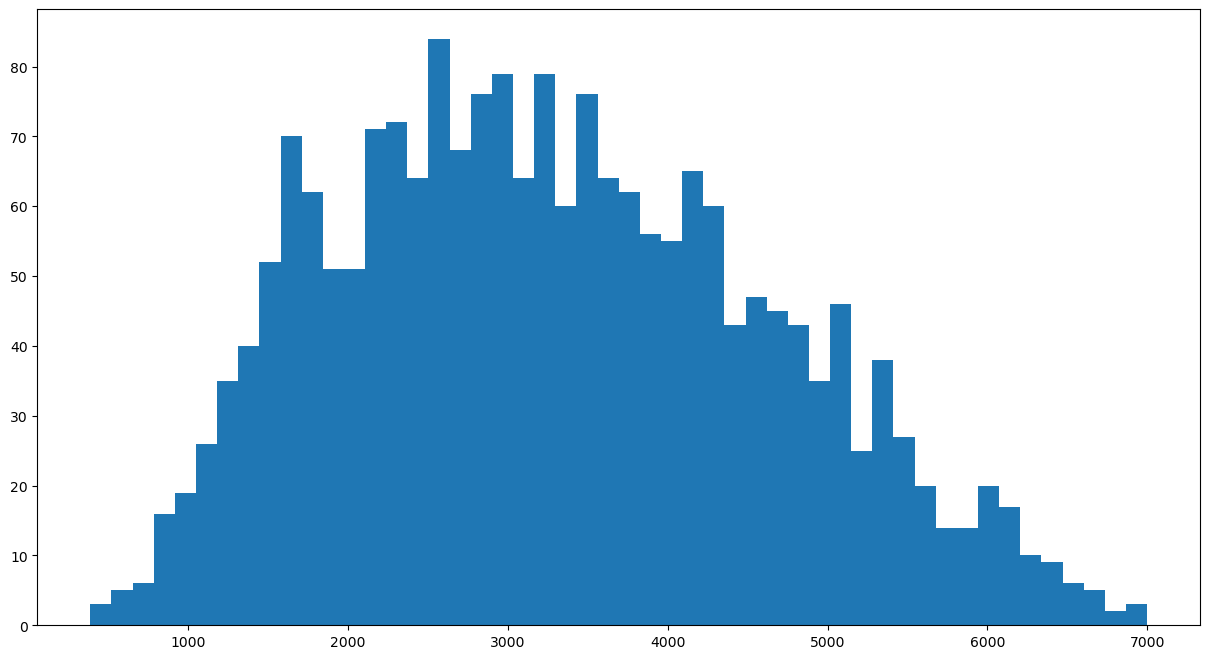

In [230]:
plt.figure(figsize=(15,8))

plt.hist(df_player[df_player['minutes played']<8000]['minutes played'], bins=50)
plt.show()


In [231]:
df_player=df_player[df_player['minutes played']<8000]
df_player.shape

(2060, 8)

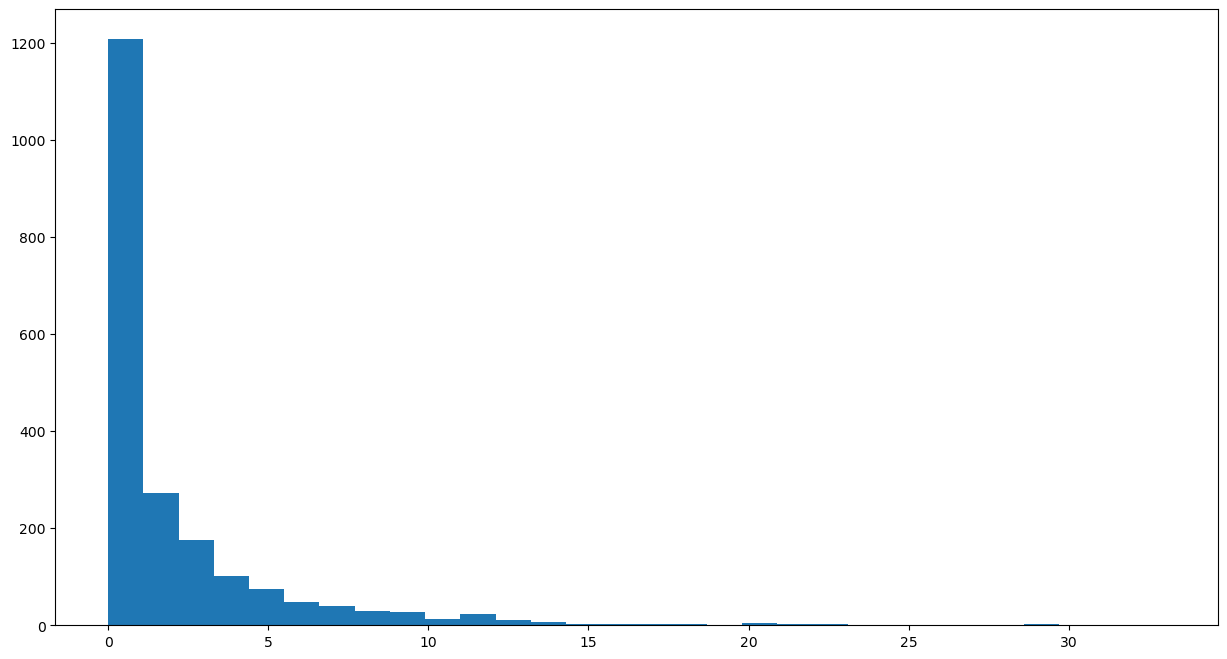

In [232]:
plt.figure(figsize=(15,8))
plt.hist(df_player['award'], bins=30)
plt.show()
                          

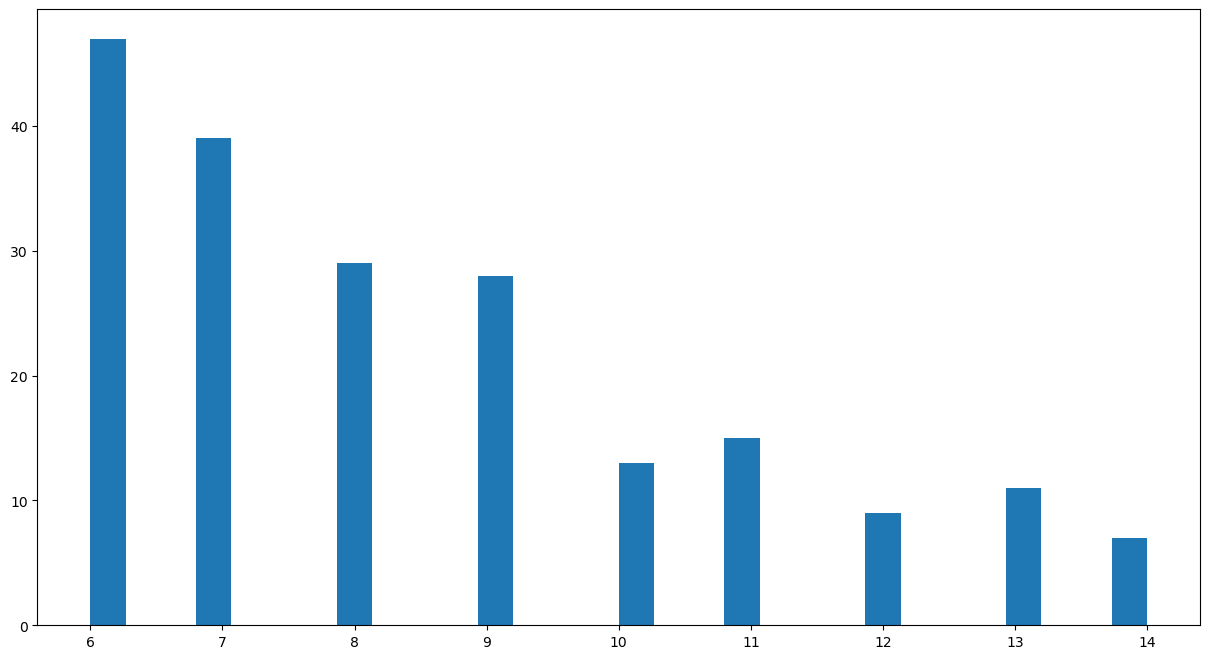

In [233]:

plt.figure(figsize=(15,8))

plt.hist(df_player[(df_player['award']<15) & (df_player['award']>5)]['award'], bins=30)
plt.show()


In [234]:
df_player=df_player[(df_player['award']<15) & (df_player['award']>5)]

In [235]:
df_player.shape

(198, 8)

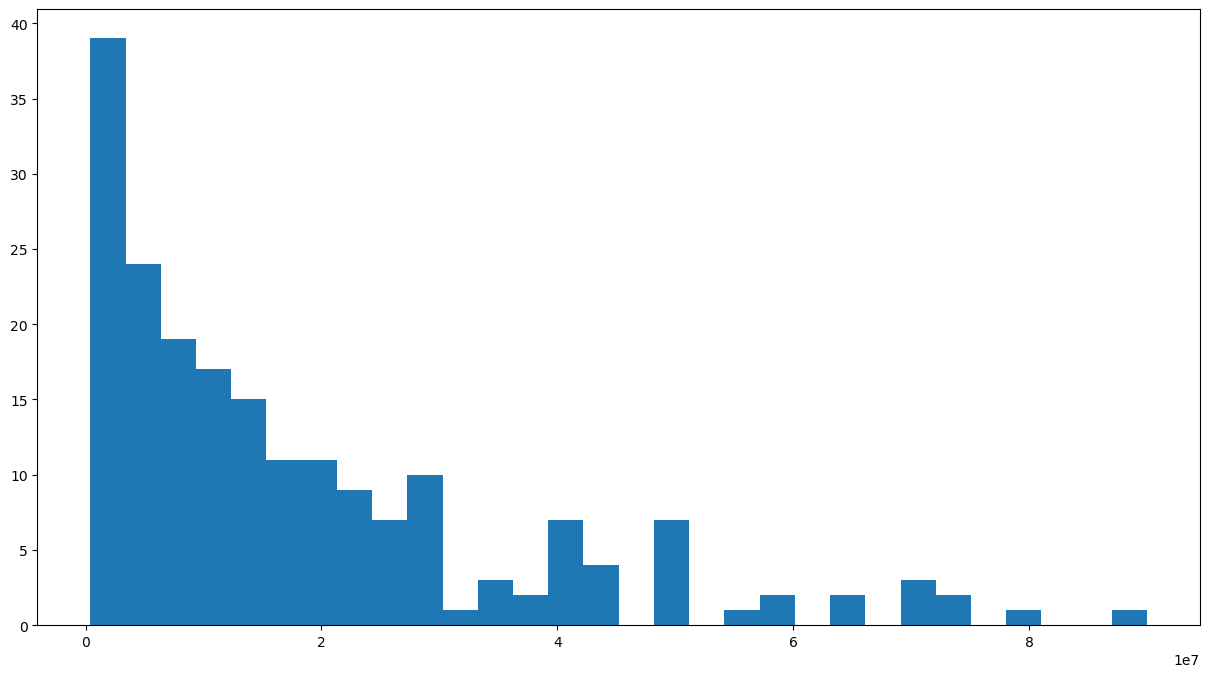

In [236]:
plt.figure(figsize=(15,8))
plt.hist(df_player['highest_value'], bins=30)
plt.show()
                                           

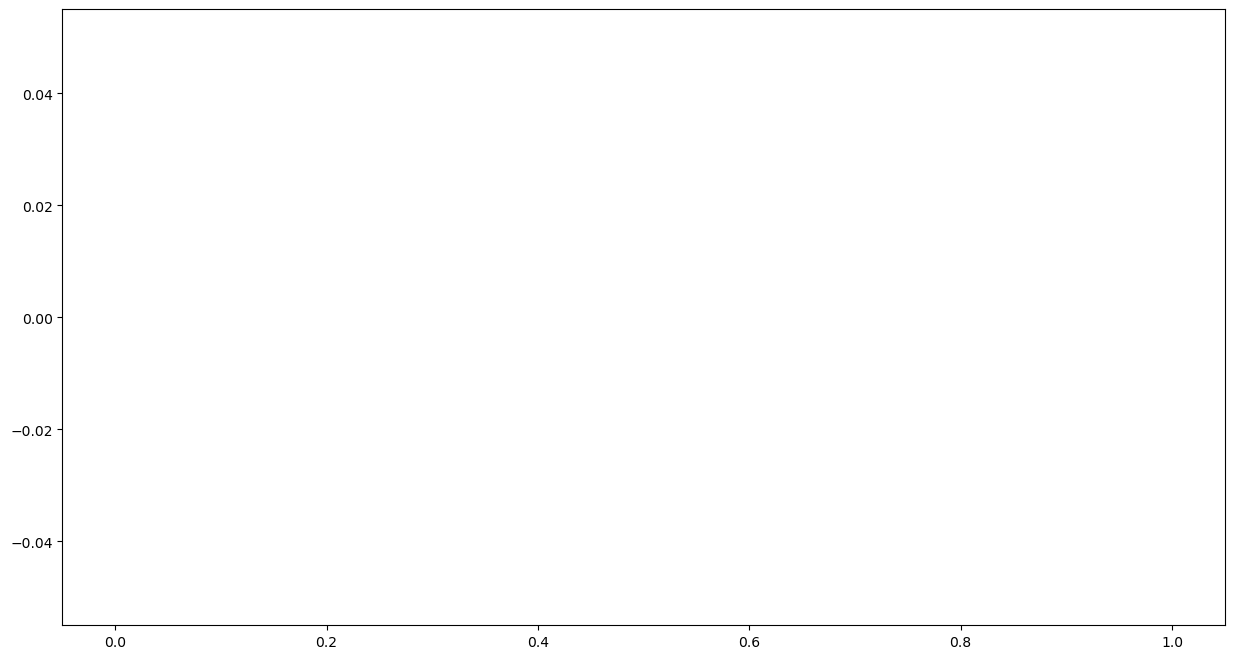

In [191]:
plt.figure(figsize=(15,8))

plt.hist(df_player[(df_player['highest_value']<0.9) & (df_player['highest_value']>0.1)]['highest_value'], bins=100) ## i can not delete more 
plt.show()


In [237]:
df_player.shape

(198, 8)

In [238]:
df_player.columns

Index(['appearance', 'goals', 'assists', 'minutes played', 'award',
       'current_value', 'highest_value', 'position_encoded'],
      dtype='object')

In [241]:

df_player.info() # no need to classify the columns

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 17 to 10690
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appearance        198 non-null    int64  
 1   goals             198 non-null    float64
 2   assists           198 non-null    float64
 3   minutes played    198 non-null    int64  
 4   award             198 non-null    int64  
 5   current_value     198 non-null    int64  
 6   highest_value     198 non-null    int64  
 7   position_encoded  198 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 13.9 KB


In [239]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 17 to 10690
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appearance        198 non-null    int64  
 1   goals             198 non-null    float64
 2   assists           198 non-null    float64
 3   minutes played    198 non-null    int64  
 4   award             198 non-null    int64  
 5   current_value     198 non-null    int64  
 6   highest_value     198 non-null    int64  
 7   position_encoded  198 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 13.9 KB


In [242]:
correlation = df_player.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value       1.000000
highest_value       0.691411
minutes played      0.404524
appearance          0.395162
assists             0.182216
award               0.168615
goals              -0.035600
position_encoded   -0.132441
Name: current_value, dtype: float64


In [243]:
# Set the correlation threshold
threshold = 0.18  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'assists', 'minutes played', 'current_value',
       'highest_value'],
      dtype='object')

In [246]:
selected_features=['appearance', 'assists', 'minutes played', 'current_value',
       'highest_value']
selected_features

['appearance', 'assists', 'minutes played', 'current_value', 'highest_value']

In [247]:
df = df_player[selected_features]
df.head()

,appearance,assists,minutes played,current_value,highest_value
17,74,0.086428,3124,20000000,42000000
30,52,0.145103,2481,15000000,65000000
74,51,0.107143,2520,8000000,25000000
78,74,0.211827,3399,20000000,22000000
80,75,0.141796,4443,4000000,20000000


In [248]:
# Prepare data
features= df.drop(['current_value'], axis=1)
target = df['current_value']


In [249]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=50)


# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

In [ ]:
marathon_df.describe().T

In [ ]:
# describe(include=’all’) provides a statistics summary of all data, include object, category etc
marathon_df.describe(include='object').T

In [ ]:
print(marathon_df['Pace_min_Km'].mean())
print(marathon_df['Pace_min_Km'].std())

In [ ]:
print(np.mean(marathon_df['Pace_min_Km']))
print(round(np.std(marathon_df['Pace_min_Km']),3))

In [ ]:
np.quantile(marathon_df['Pace_min_Km'],0.25)

In [ ]:
marathon_df['Pace_min_Km'].quantile(0.25)